In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [38]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///C:/Users/15132/OneDrive/Desktop/SQL Alchemy/Starter_Code/Resources/hawaii.sqlite")

In [39]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


C:\Users\15132\AppData\Local\Temp\ipykernel_20556\1526636886.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement 

In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
recent = session.query(func.max(measurement.date)).scalar()
print(recent)

2017-08-23


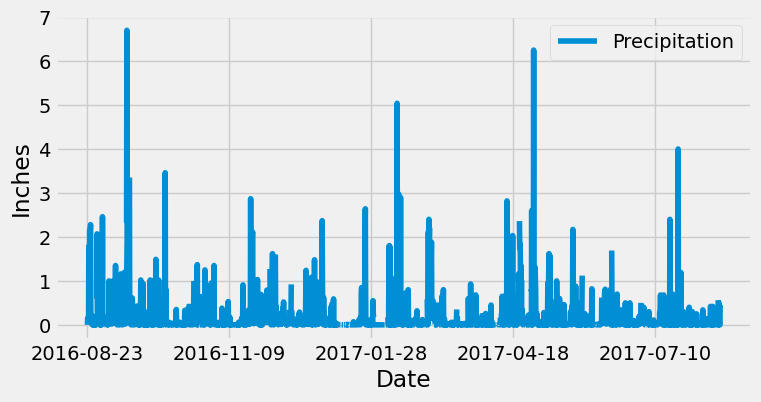

In [45]:
# Calculate the date one year from the last date in data set.

one_year = dt.date(2017, 8,23) - dt.timedelta(days=365)
#print(one_year)

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores

twelve_recent = session.query(measurement.date, measurement.prcp).filter(
    measurement.date >= one_year,
    measurement.date <= recent).order_by(measurement.date).all()
#print(twelve_recent)


# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(twelve_recent, columns=['Date', 'Precipitation'])
#df.head()

# Sort the dataframe by date

df_sorted = df.sort_values(by= 'Date')
#df_sorted.head()

# Use Pandas Plotting with Matplotlib to plot the data

ax = df_sorted.plot(x = 'Date', figsize=(8,4))
plt.ylabel('Inches')
plt.show()


In [46]:
# Use Pandas to calculate the summary statistics for the precipitation data

df_sorted.describe()



,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [57]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(station.id)).scalar()
station_count


9

In [63]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = "USC00519281"
temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active).all()
temps


[(54.0, 85.0, 71.66378066378067)]

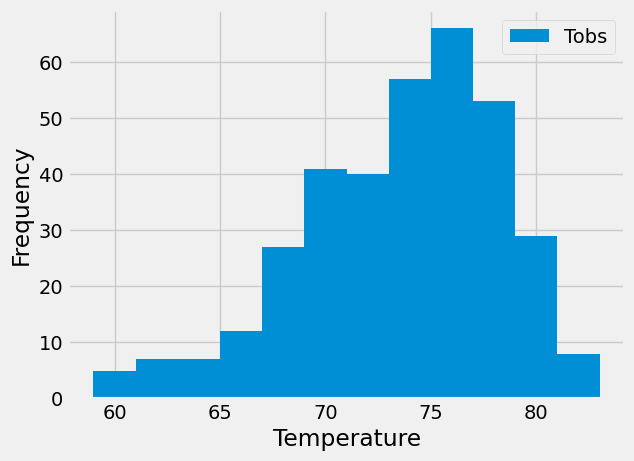

In [103]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

one_year2 = dt.date(2017, 8,23) - dt.timedelta(days=365)

twelve_recent2 = session.query(measurement.date, measurement.tobs).filter(
    measurement.date >= one_year2,
    measurement.date <= recent, measurement.station == most_active).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df2 = pd.DataFrame(twelve_recent2, columns=['Date', 'Tobs'])
#df.head()


# Use Pandas Plotting with Matplotlib to plot the data

plt.hist(df2['Tobs'], bins = 12, label = "Tobs")
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()




# Close Session

In [104]:
# Close Session
session.close()